In [1]:
import sys
import deepwalk
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def check_method(method):
    val = None
    if method == "kmedoids" or method == "Kmedoids":
        val = "kmedoids"
    elif method == "kmeans" or method == "Kmeans":
        val = "kmeans"
    else:
        sys.exit(f"methodの値が無効です method : {method}")
    return val

def check_data(data):
    if data == "football" or data == "polbooks" or data == "karateclub":
        pass
    else:

        sys.exit(f"変数dataの値が無効です data : {data}")


In [3]:
# 実行回数(埋め込み-クラスタリング-ARI)
TIME = 100

"""
data : 使用するデータ
football   : "football"
polbooks   : "polbooks"
karateclub : "karateclub"
"""
data = "karateclub"
check_data(data)

# インプットするファイル名
INPUT = deepwalk.generate_Graph(data)

# 正解ラベル
TRUE_LABEL = deepwalk.get_label_list(data)

# インプットするグラフが無向グラフかどうか(True:無向グラフ,　False:有向グラフ)
UNDIRECTED = True


# １ノードあたりの実行数
NUMBER_WALKS = 10

# 1ウォークあたりの長さ
WALK_LENGTH = 10

# skipgramので使われるウィンドウサイズ
WINDOW_SIZE = 4


# ランダムシード値
SEED = 0

# 埋め込み後の各ノードの次元数
REPRESENTATION_SIZE_LIST = range(1,31)

# 並列プロセス数
WORKERS = 1

# クラスタ数
N_CLUSTER = 2

# クラスタリング手法
"""
kmedoids : "kmedoids"
kmeans   : "kmeans"
"""
METHOD = check_method("kmeans")

# 結果を表示するかどうか
SHOW = False

raito_list = []


In [4]:
"""
    グラフ生成
    G = from_networkx(INPUT:networkxグラフインスタンス, 無効グラフかどうか:boolean)
    """
G = deepwalk.from_networkx(INPUT, True)
# ノード数出力
print("Number of nodes: {}".format(len(G.nodes())))

# ウォーク数算出(ノード数*1ノードあたりのウォーク数)と出力
num_walks = len(G.nodes()) * NUMBER_WALKS
print("Number of walks: {}".format(num_walks))

# データサイズ(ウォーク数*ウォークの長さ)の算出と出力
data_size = num_walks * WALK_LENGTH
print("Data size (walks*length): {}".format(data_size))


Number of nodes: 34
Number of walks: 340
Data size (walks*length): 3400


In [5]:
raito_list = []
for REPRESENTATION_SIZE in REPRESENTATION_SIZE_LIST:
    mean_contribution, rounded_mean_contribution = deepwalk.get_contribution(INPUT, UNDIRECTED, NUMBER_WALKS, WALK_LENGTH,
                                      REPRESENTATION_SIZE, WINDOW_SIZE, WORKERS)
    zeroList = [0] * (max(REPRESENTATION_SIZE_LIST)-REPRESENTATION_SIZE)
    #mean_contribution, rounded_mean_contributionにzeroListを結合
    mean_contribution.extend(zeroList)
    
    raito_list.append(mean_contribution)

    

In [20]:
raito_list

[[1.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.7723307609558105,
  0.2276691049337387,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.6559369564056396,
  0.262947142124176,
  0.08111586421728134,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.6629545092582703,
  0.23538632690906525,
  0.05950329452753067,
  0.04215599223971367,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.6649297475814819,
  0.2263951152563095,
  0.05009714514017105,
  0.032849784940481186,
  0.02572827786207199,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]

In [9]:
normalized_data = np.array(raito_list)

In [19]:
normalized_data

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.72330761e-01, 2.27669105e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


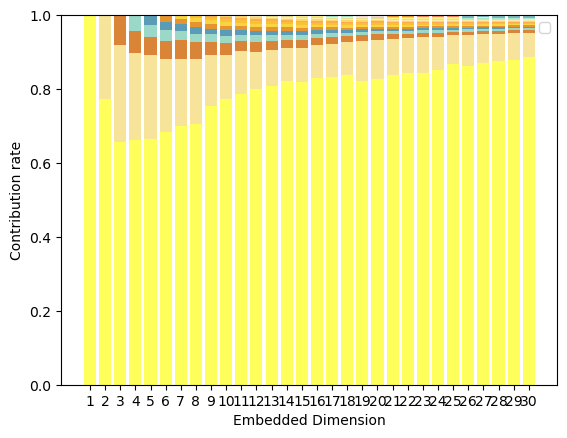

In [6]:
# 行ごとに合計を計算し、それで行を正規化する
normalized_data = np.array(raito_list)
normalized_data /= normalized_data.sum(axis=1, keepdims=True)

# 可視化
x_labels = ['1', '2', '3', '4', '5','6', '7', '8', '9', '10','11', '12', '13', '14', '15','16', '17', '18', '19', '20','21', '22', '23', '24', '25','26', '27', '28', '29', '30']
colors = [
    [255/255, 138/255, 92/255],
    [252/255, 174/255, 79/255],
    [249/255, 211/255, 66/255],
    [246/255, 247/255, 52/255],
    [255/255, 255/255, 92/255],
    [253/255, 244/255, 135/255],
    [250/255, 233/255, 178/255],
    [247/255, 222/255, 221/255],
    [141/255, 193/255, 195/255],
    [116/255, 174/255, 188/255],
    [92/255, 155/255, 181/255],
    [90/255, 156/255, 181/255],
    [106/255, 171/255, 186/255],
    [123/255, 186/255, 190/255],
    [139/255, 200/255, 195/255],
    [155/255, 216/255, 200/255],
    [171/255, 231/255, 205/255],
    [191/255, 229/255, 183/255],
    [211/255, 227/255, 161/255],
    [231/255, 225/255, 139/255],
    [247/255, 227/255, 153/255],
    [255/255, 233/255, 167/255],
    [252/255, 214/255, 109/255],
    [250/255, 194/255, 51/255],
    [248/255, 174/255, 38/255],
    [241/255, 166/255, 41/255],
    [235/255, 157/255, 45/255],
    [229/255, 149/255, 48/255],
    [223/255, 140/255, 51/255],
    [218/255, 132/255, 55/255]
]
np.random.shuffle(colors)
fig, ax = plt.subplots()
for i in range(len(x_labels)):
    ax.bar(x_labels, normalized_data[:, i], bottom=np.sum(
        normalized_data[:, :i], axis=1), color=colors[i])

ax.set_ylabel('Contribution rate')
ax.set_xlabel('Embedded Dimension')
ax.legend()

plt.show()
